In [1]:
import numpy as np
import matplotlib.pyplot as plt

#plank constant and speed of light
h = 6.6260755e-27
c = 2.99792458e18
hc = h*c

    

In [2]:
filter_integer_array=range(int(641))


In [3]:
spectralfile = '../spectra/SN2011fe_peak_11fe_appended.dat'
labellist = ['SN2011fe']

wavelist=[]
fluxlist=[]

range=8000.0
f = open('' +spectralfile,'r') #open file
for line in f:
        line = line.rstrip()
        column = line.split() # split line into a list 
        wavelength = float(column[0]) #putting data into named variable for readability
        flux = float(column[1])
        #print('wavelist', x)

        if(float(wavelength) > range): #if the wavelength is out of range, it will ignore it, this is so the fluxcount function can work
          continue
        wavelist.append(float(wavelength))
        fluxlist.append(float(flux))



#wavez, fluxz=rangebin(1600,8000,wavelist,fluxlist)






In [4]:
files = ['../filters/UVW2_2010.txt','../filters/UVM2_2010.txt','../filters/UVW1_2010.txt','../filters/U_UVOT.txt','../filters/B_UVOT.txt', '../filters/V_UVOT.txt']
filterfile=  '../filters/UVW2_2010.txt'
filter_lambda = []
filter_area = []
#getting data from files
#for item in files:
#Necessary to have "../" when running in /python/ directory
f = open(filterfile,'r')

#	print(item)
    #seperating each filter's values so i can later apply them seperately
for line in f:
        line = line.rstrip()
        column = line.split()
#		print(column)
        wavelen = column[0]
        area = column[1]
        filter_lambda.append(float(wavelen))
        filter_area.append(float(area))
f.close()




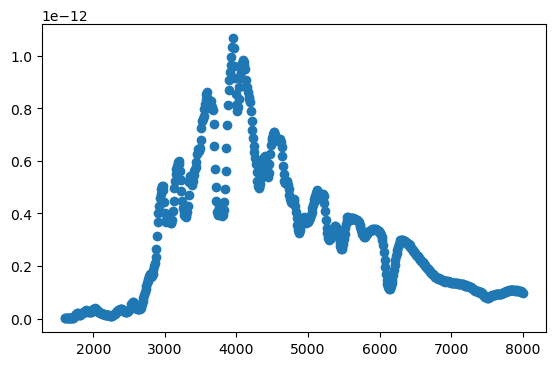

In [5]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

cs = CubicSpline(wavelist,fluxlist)
filter_flux=cs(filter_lambda)


fig, ax = plt.subplots(figsize=(6.5, 4))
#ax.plot(wavelist, fluxlist, 'o', label='data')
ax.plot(filter_lambda, filter_flux, 'o', label='true')

plt.show()

../filters/UVW2_2010.txt
1600.0 counts fraction  1.8494202630817005e-05 energy fraction  2.8991495743927968e-05
../filters/UVW2_2010.txt
1610.0 counts fraction  7.222086588706574e-05 energy fraction  0.0001126902485068608
../filters/UVW2_2010.txt
1620.0 counts fraction  0.0001844574693893296 energy fraction  0.0002864601257698216
../filters/UVW2_2010.txt
1630.0 counts fraction  0.00036378807554919573 energy fraction  0.000562404665804675
../filters/UVW2_2010.txt
1640.0 counts fraction  0.0006235095753361423 energy fraction  0.0009596136357135607
../filters/UVW2_2010.txt
1650.0 counts fraction  0.0009527372773119407 energy fraction  0.0014600713864505557
../filters/UVW2_2010.txt
1660.0 counts fraction  0.0013568387482357563 energy fraction  0.0020706440222667748
../filters/UVW2_2010.txt
1670.0 counts fraction  0.0018205156544364412 energy fraction  0.002767036366689913
../filters/UVW2_2010.txt
1680.0 counts fraction  0.0023040005789199047 energy fraction  0.0034888559300171916
../filter

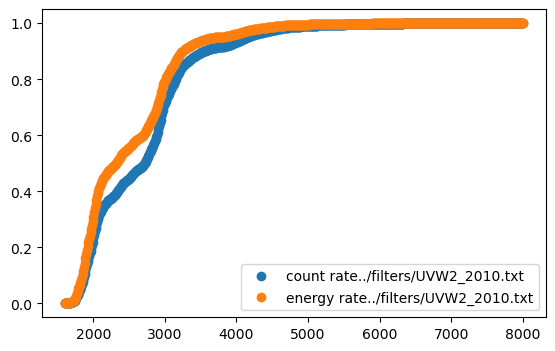

In [6]:
counts_array=[]
sumcounts_array=[]
sum=0
ergs_array=[]
sumergs_array=[]
ergs=0
counts_fraction=[]
ergs_fraction=[]
for x in filter_integer_array:
    counts_array.append(filter_area[x] * filter_flux[x])  #np.trapz( , wavez) #area of the filter at this wv, times flux at this wv, times wv at this wv / plank * c
    sumcounts_array.append(counts_array[x]+sum)
    sum=sumcounts_array[x]
    ergs_array.append(filter_area[x] * filter_flux[x]*hc/filter_lambda[x])  #np.trapz( , wavez) #area of the filter at this wv, times flux at this wv, times wv at this wv / plank * c
    sumergs_array.append(ergs_array[x]+ergs)
    ergs=sumergs_array[x]

total=max(sumcounts_array)
ergstotal=max(sumergs_array)

for x in filter_integer_array:
    counts_fraction.append(sumcounts_array[x]/total)  #np.trapz( , wavez) #area of the filter at this wv, times flux at this wv, times wv at this wv / plank * c
    ergs_fraction.append(sumergs_array[x]/ergstotal)  #np.trapz( , wavez) #area of the filter at this wv, times flux at this wv, times wv at this wv / plank * c
    print(filterfile)
    print(filter_lambda[x], 'counts fraction ', counts_fraction[x], 'energy fraction ', ergs_fraction[x])

fig, ax = plt.subplots(figsize=(6.5, 4))
#ax.plot(wavelist, fluxlist, 'o', label='data')
ax.plot(filter_lambda, sumcounts_array/total, 'o', label='count rate'+filterfile)
ax.plot(filter_lambda, sumergs_array/ergstotal, 'o', label='energy rate'+filterfile)
ax.legend()
plt.show()